In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

df_rest = pd.read_csv('./restaurants.csv')
df_data = pd.read_csv('./data.csv')
df_data.head(100)
df_train = pd.read_csv('./train.csv')
df_train = df_train.merge(df_data, on=["Date", "City", "IsHoliday"])
df_train = df_train.merge(df_rest, on = ["City"])
df_train["Date"] = pd.to_datetime(df_train['Date'],format='mixed')
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
df_train['Month'] = df_train["Date"].dt.month
df_train["Weekly_Sales"] = df_train["Weekly_Sales"].apply(lambda x: np.abs(x))
df_train = df_train.drop(columns=['Date'])
df_train["IsHoliday"] = df_train["IsHoliday"].astype(int)


In [120]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
numerical_cols = ['Temperature', 'Fuel_Price', 'Unemployment', 'Size', "City", "Restaurant", "IsHoliday", "DayOfWeek", "Month"]
scaler = scaler.fit(df_train[numerical_cols])
sale_scaler=StandardScaler().fit(df_train[["Weekly_Sales"]])
df_train[numerical_cols] = scaler.transform(df_train[numerical_cols])
df_train[["Weekly_Sales"]] = sale_scaler.transform(df_train[["Weekly_Sales"]])
df_train

,City,Restaurant,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Unemployment,Size,DayOfWeek,Month
0,-1.646675,-1.434510,0.263652,-0.296362,-0.881718,-1.414627,0.151338,0.106969,1.659625,-0.514456
1,-1.646675,-1.434510,1.081089,3.374250,-1.080576,-1.469879,0.151338,0.106969,-0.543254,1.536567
2,-1.646675,-1.434510,0.909048,-0.296362,-1.006266,-1.548152,0.151338,0.106969,0.191039,-1.393466
3,-1.646675,-1.434510,0.049916,-0.296362,-0.655646,-1.439951,0.151338,0.106969,0.191039,-1.393466
4,-1.646675,-1.434510,0.143772,-0.296362,-0.662450,-1.292613,0.151338,0.106969,-2.746132,-0.514456
...,...,...,...,...,...,...,...,...,...,...
137933,1.636680,1.872393,-0.215409,3.374250,-0.668729,0.703356,-0.475301,0.987491,0.191039,1.243564
137934,1.636680,1.872393,-0.637580,-0.296362,-0.916780,0.526090,-0.475301,0.987491,-2.746132,0.657557
137935,1.636680,1.872393,-0.512729,-0.296362,-1.151224,0.521486,-0.475301,0.987491,0.191039,1.536567
137936,1.636680,1.872393,-0.530150,-0.296362,-0.992660,0.466234,-0.475301,0.987491,0.191039,1.536567


In [6]:
from scipy.stats import zscore
z_scores = df_train[["Weekly_Sales"]].apply(zscore)
# Identify outliers based on z-score threshold
outliers = df_train[(z_scores > 3).any(axis=1)]
print("Outliers:", outliers)
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
clf = IsolationForest(contamination=0.1)
clf.fit(df_train)

# Predict outliers
outliers = clf.predict(df_train)
outlier_indices = df_train[outliers == -1].index
print("Outliers:", df_train.iloc[outlier_indices])

Outliers:         City  Restaurant  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
645     -1.0   -0.877551     -0.722412       -1.0     0.024882   -0.581615   
646     -1.0   -0.877551     -0.518979       -1.0     0.074052   -0.561579   
698     -1.0   -0.877551     -0.655743       -1.0    -0.012243   -0.295227   
3579    -1.0   -0.244898     -0.666529       -1.0    -0.123815   -0.931644   
3581    -1.0   -0.244898     -0.715271       -1.0    -0.170814   -1.000000   
...      ...         ...           ...        ...          ...         ...   
137714   1.0    0.918367     -0.619890       -1.0    -0.044629    0.105480   
137715   1.0    0.918367     -0.569806       -1.0    -0.137046    0.061874   
137716   1.0    0.918367     -0.564518       -1.0    -0.225513    0.059517   
137717   1.0    0.918367     -0.529491       -1.0    -0.165679    0.031232   
137718   1.0    0.918367     -0.661699        1.0    -0.241509    0.031232   

        Unemployment      Size  DayOfWeek     Month  

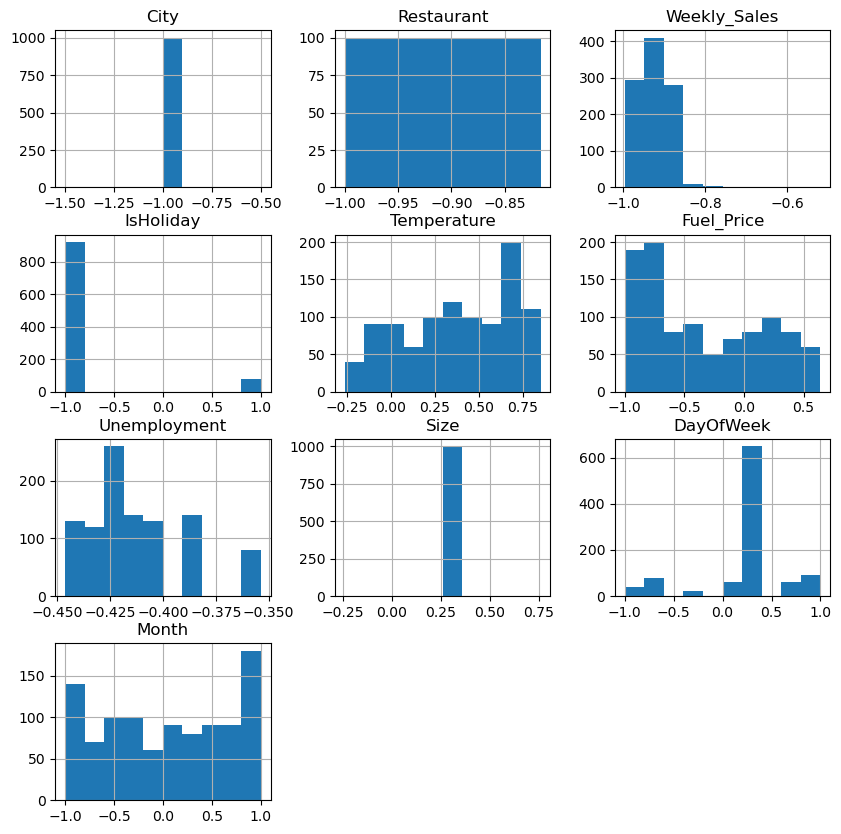

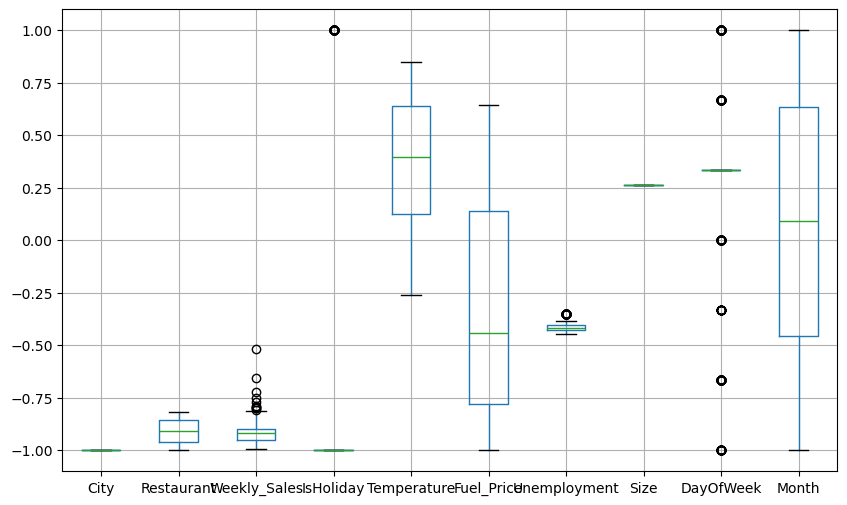

d:\miniconda3\envs\mlenv312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
d:\miniconda3\envs\mlenv312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
d:\miniconda3\envs\mlenv312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
d:\miniconda3\envs\mlenv312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
posx and posy should be finite values


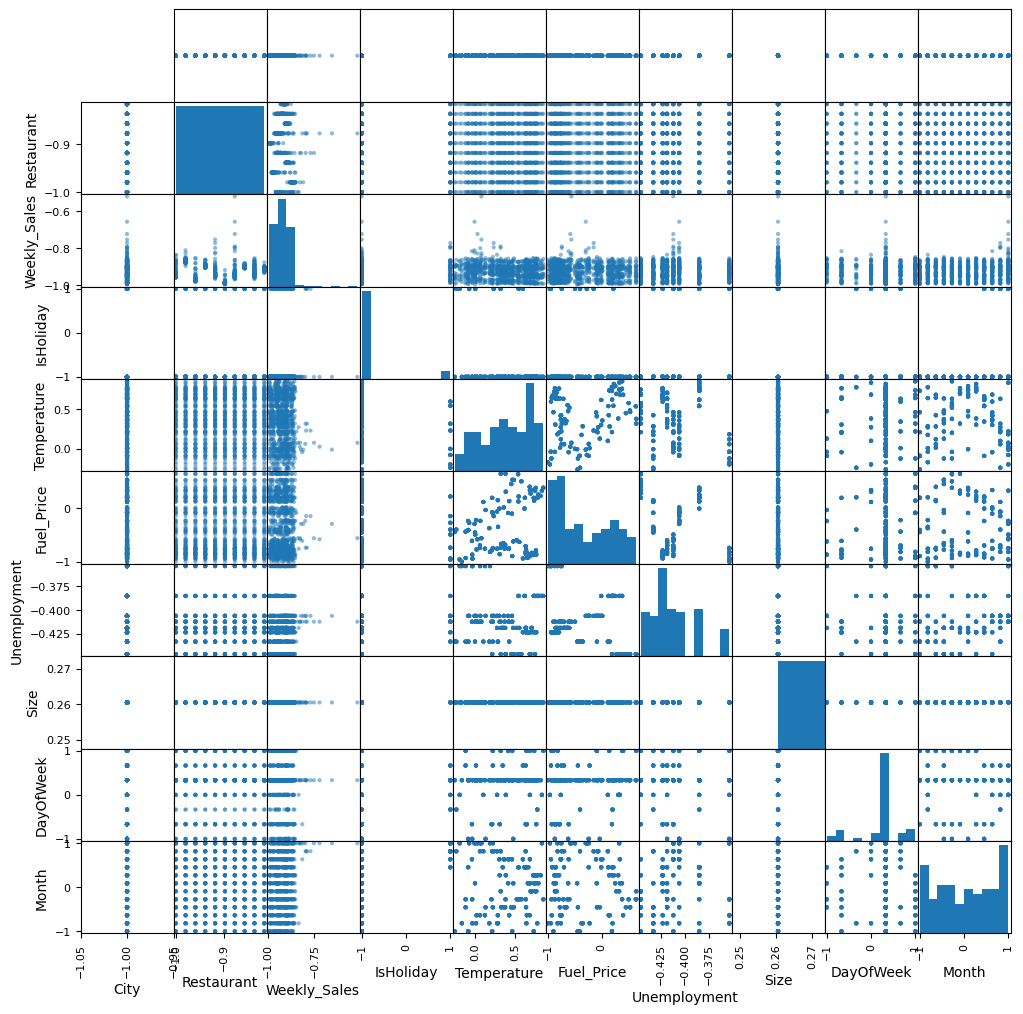

In [7]:
df_train[:1000].hist(figsize=(10, 10))
plt.show()

# Create box plots for numeric features
df_train[:1000].boxplot(figsize=(10, 6))
plt.show()

# Create scatter plots for pairwise relationships
pd.plotting.scatter_matrix(df_train[:1000], figsize=(12, 12))
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train, target = df_train.drop(columns=["Weekly_Sales"]), df_train[["Weekly_Sales"]]
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=False)


In [5]:
modelLinear = LinearRegression()

# Train the model on the training data
modelLinear = modelLinear.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = modelLinear.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9688624353335633


d:\miniconda3\envs\mlenv312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[[-0.4594487]] Weekly_Sales    0.246383
Name: 110350, dtype: float64


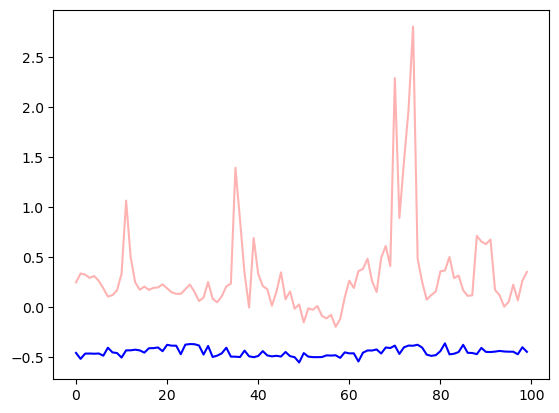

In [6]:
print(modelLinear.predict([X_test.iloc[0]]),y_test.iloc[0])
plt.plot(range(100),(y_test[:100]), color="red", alpha=0.3)
plt.plot(range(100),(modelLinear.predict(X_test[:100])), color="blue")
plt.show()

In [ ]:
import torch
sequence_length = 4  
sequences = []
targets = []
indexes = df_train.keys().drop("Weekly_Sales")
df_features = df_train[["Weekly_Sales"]]
df_train_seq = df_train.drop(columns=["Weekly_Sales"])
for i in range(len(df_train) - sequence_length):
    sequences.append(df_train_seq.iloc[i:i+sequence_length].values)
    targets.append(df_features.iloc[i+sequence_length])
X_sequences = torch.tensor(sequences, dtype=torch.float32)
y_targets = torch.tensor(targets, dtype=torch.float32)

In [8]:
from sklearn.model_selection import train_test_split


X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_sequences, y_targets, test_size=0.2, shuffle=False)
y_train.shape

(110350, 1)

In [9]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train_rnn, y_train_rnn)
test_dataset = TensorDataset(X_test_rnn, y_test_rnn)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [16]:

import torch.nn as nn
from torch.utils.data import Dataset
from torch.autograd import Variable
 
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,dropout=0.2)
        self.norm = nn.BatchNorm1d(hidden_size)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
    
        out, _ = self.lstm(x, (h0, c0))  # Output shape: (batch_size, seq_length, hidden_size)
        out = self.norm(out[:, -1, :])
        out = self.fc(out)
        return out
    
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.city = dataframe["City"]
        self.rest = dataframe["Restaurant"]
        self.date = dataframe["Date"]
        self.sales = dataframe["Weekly_Sales"]
        self.holiday = dataframe["IsHoliday"]
        self.temp = dataframe["Temperature"]
        self.fuel = dataframe["Fuel_Price"]
        self.unemploy = dataframe["Unemployment"]
        

    def __len__(self):
        return len(self.date)

    def __getitem__(self, idx):
        city = self.city.iloc[idx]
        rest = self.rest.iloc[idx]
        date = self.date.iloc[idx]
        sales = self.sales.iloc[idx]
        holiday = self.holiday.iloc[idx]
        temp = self.temp.iloc[idx]
        fuel = self.fuel.iloc[idx]
        unemploy = self.unemploy.iloc[idx]
        return torch.tensor(city), torch.tensor(rest), torch.tensor(date), torch.tensor(sales), torch.tensor(holiday), torch.tensor(temp), torch.tensor(fuel), torch.tensor(unemploy)

In [ ]:
import os
import numpy as np
import torch.optim as optim
import torch.utils.data as data
from tqdm import tqdm
import torch.nn.functional as F

input_size = 9
hidden_size = 322
num_layers = 2
model_name = "model_8.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size,hidden_size,num_layers).to(device)
if os.path.exists(model_name):
    model.load_state_dict(torch.load(model_name))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion  = nn.SmoothL1Loss()
 
n_epochs = 200

for epoch in range(n_epochs):
    model.train()
    total_loss = 0.0
    for data, targets in tqdm(train_loader,desc=f"Training {epoch + 1}/{n_epochs}"):
        data, targets = data.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}')
    if epoch % 10 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = 0
        target = 0
        test_rmse = 0
        loss = 0
        for data, targets in tqdm(test_loader, desc="Validation"):
            data, targets = data.to(device), targets.to(device)
            y_pred = model(data)
            test_rmse = criterion(y_pred.squeeze(), targets)
            loss += test_rmse.item()
        print(y_pred, target)
    torch.save(model.state_dict(), model_name)
    print("Epoch %d, test L1 %.4f" % (epoch, test_rmse))
torch.save(model.state_dict(), model_name)


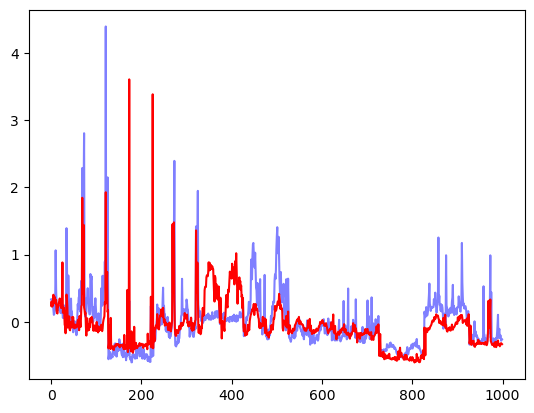

In [27]:
with torch.no_grad():
    model.cpu()
    model.eval()
    num_samples = 1000
    plt.plot(range(num_samples), y_test_rnn[:num_samples], color="blue", alpha=0.5)
    plt.plot(range(num_samples), model(X_test_rnn[:num_samples]), color="red")
    plt.savefig(model_name.split('.')[0] + ".png")
    plt.show()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
with torch.no_grad():
    r2 = r2_score(y_test_rnn, model(X_test_rnn))
    mse = mean_squared_error(y_test_rnn, model(X_test_rnn))
    mae = mean_absolute_error(y_test_rnn, model(X_test_rnn))

In [34]:
r2, mse, mae

(0.6456229245421017, 0.36220917, 0.32300568)

In [61]:
df_input = pd.read_csv('test.csv')
df_input = df_input.merge(df_data, on=["Date", "City", "IsHoliday"])
df_input = df_input.merge(df_rest, on = ["City"])
df_input["Date"] = pd.to_datetime(df_input['Date'],format='mixed')
df_input['DayOfWeek'] = df_input['Date'].dt.dayofweek
df_input['Month'] = df_input["Date"].dt.month
df_input = df_input.drop(columns=['Date'])
df_input["IsHoliday"] = df_input["IsHoliday"].astype(int)
scaler = StandardScaler()
numerical_cols = ['Temperature', 'Fuel_Price', 'Unemployment', 'Size', "City", "Restaurant","IsHoliday", "DayOfWeek", "Month"]
scaler = scaler.fit(df_input[numerical_cols])
df_input[numerical_cols] = scaler.transform(df_input[numerical_cols])

In [112]:
import torch
sequence_length = 4
df_train_seq = df_train.drop(columns=["Weekly_Sales"])[-4:]
sequences = []
df_input_seq = df_input
for i in range(sequence_length):   
    sequences.append(np.concatenate((df_train_seq.iloc[i:].values, df_input_seq.iloc[:i].values)))
print(sequences)
for i in range(len(df_input) - sequence_length):
    sequences.append(df_input_seq.iloc[i:i+sequence_length].values)
X_sequences = torch.tensor(sequences, dtype=torch.float32)

[array([[ 1.63668017,  1.87239304, -0.29636217, -0.91677957,  0.5260902 ,
        -0.47530054,  0.98749142, -2.74613227,  0.65755718],
       [ 1.63668017,  1.87239304, -0.29636217, -1.15122374,  0.52148589,
        -0.47530054,  0.98749142,  0.19103922,  1.53656727],
       [ 1.63668017,  1.87239304, -0.29636217, -0.99265993,  0.46623416,
        -0.47530054,  0.98749142,  0.19103922,  1.53656727],
       [ 1.63668017,  1.87239304,  3.37424979, -1.19361208,  0.46623416,
        -0.47530054,  0.98749142,  0.19103922,  1.53656727]]), array([[ 1.63668017,  1.87239304, -0.29636217, -1.15122374,  0.52148589,
        -0.47530054,  0.98749142,  0.19103922,  1.53656727],
       [ 1.63668017,  1.87239304, -0.29636217, -0.99265993,  0.46623416,
        -0.47530054,  0.98749142,  0.19103922,  1.53656727],
       [ 1.63668017,  1.87239304,  3.37424979, -1.19361208,  0.46623416,
        -0.47530054,  0.98749142,  0.19103922,  1.53656727],
       [-1.65094065, -1.43367753, -0.22158873, -0.84362241,

In [113]:
input_size = 9
hidden_size = 322
num_layers = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size, hidden_size, num_layers).to(device)
model_name = "model_8.pt"
model = LSTMModel(input_size,hidden_size,num_layers).to(device)
model.load_state_dict(torch.load(model_name))

<All keys matched successfully>

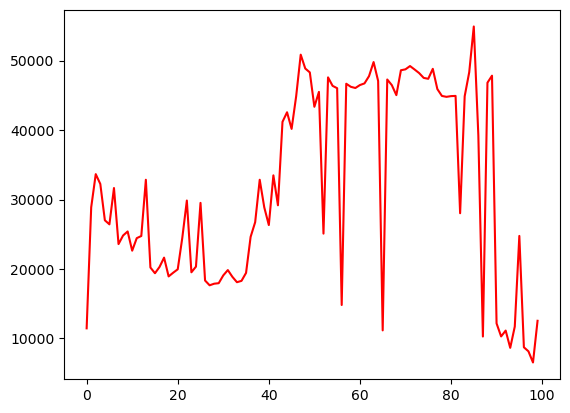

       City  Restaurant      Date  IsHoliday  Weekly_Sales
0         1           1  06-01-12      False  11448.292969
1         1           1  13-01-12      False  28872.636719
2         1           1  20-01-12      False  33652.699219
3         1           1  27-01-12      False  32239.115234
4         1           1  03-02-12      False  27008.876953
...     ...         ...       ...        ...           ...
59606    20          99  07-09-12       True  16771.521484
59607    20          99  14-09-12      False  16033.214844
59608    20          99  21-09-12      False  17276.873047
59609    20          99  05-10-12      False  16393.261719
59610    20          99  12-10-12      False  30057.666016

[59611 rows x 5 columns]


In [127]:
with torch.no_grad():
    model.eval()
    out = sale_scaler.inverse_transform(model(X_sequences.to(device)).cpu().numpy())
    plt.plot(range(100), out[:100], color="red")
    plt.savefig("test.png")
    plt.show()
    df_input = pd.read_csv('test.csv')
    df_input['Weekly_Sales'] = out
    print(df_input)
    df_input.to_csv("output.csv", index=False)